In [1]:
import pandas as pd

apfs_df = pd.read_csv(r'Initial_data/ac_power_from_storage.csv')
apts_df = pd.read_csv(r'Initial_data/ac_power_to_storage.csv')
gc_df = pd.read_csv(r'Initial_data/grid_consumption.csv')
gf_df = pd.read_csv(r'Initial_data/grid_feed.csv')
pp_df = pd.read_csv(r'Initial_data/pv_production.csv')


In [2]:
'''Convert the time column to a time type'''

apfs_df['time'] = pd.to_datetime(apfs_df['time'])
apts_df['time'] = pd.to_datetime(apts_df['time'])
gc_df['time'] = pd.to_datetime(gc_df['time'])
gf_df['time'] = pd.to_datetime(gf_df['time'])
pp_df['time'] = pd.to_datetime(pp_df['time'])

'''Set the time as an index'''

apfs_df.set_index('time', inplace=True)
apts_df.set_index('time', inplace=True)
gc_df.set_index('time', inplace=True)
gf_df.set_index('time', inplace=True)
pp_df.set_index('time', inplace=True)


'''Convert the column of values to float type'''

apfs_df['ac_power_from_storage'] = apfs_df['ac_power_from_storage'].astype(float)
apts_df['ac_power_to_storage'] = apts_df['ac_power_to_storage'].astype(float)
gc_df['grid_consumption'] = gc_df['grid_consumption'].astype(float)
gf_df['grid_feed'] = gf_df['grid_feed'].astype(float)
pp_df['pv_production'] = pp_df['pv_production'].astype(float)


In [3]:
'''Group the time to get equal intervals'''

time_group = '5T' # grouping interval 5 minutes

g_apfs_df = apfs_df.resample('5T').sum()
g_apts_df = apts_df.resample('5T').sum()
g_gc_df = gc_df.resample('5T').sum()
g_gf_df = gf_df.resample('5T').sum()
g_pp_df = pp_df.resample('5T').sum()


In [ ]:


from datetime import datetime

start_date = '2016-06-10 16:50:00+00:00'
end_date = '2023-09-09 00:00:00+00:00'

columns1 = ['time', 'P_l']
df_P_l = pd.DataFrame(columns=columns1)

columns2 = ['time', 'P_pv', 'P_fu', 'P_fs', 'P_tu', 'P_ts', 'P_l']
df_general = pd.DataFrame(columns=columns2)

iteration_date = start_date
time_delta = pd.Timedelta(minutes=5)

while iteration_date < end_date:
    P_pv = g_pp_df['pv_production'][iteration_date]
    P_fu = g_gc_df['grid_consumption'][iteration_date]
    P_fs = g_apfs_df['ac_power_from_storage'][iteration_date]
    P_tu = g_gf_df['grid_feed'][iteration_date]
    P_ts = g_apts_df['ac_power_to_storage'][iteration_date]
    
    P_l = P_pv + P_fu + P_fs - (P_tu + P_ts)
    
    new_row1 = {'time': iteration_date, 'P_l': P_l}
    new_row2 = {
        'time': iteration_date,
        'P_pv': P_pv, 'P_fu': P_fu, 
        'P_fs': P_fs, 'P_tu': P_tu, 
        'P_ts': P_ts, 'P_l': P_l
    }
    df_P_l = pd.concat([df_P_l, pd.DataFrame([new_row1])], ignore_index=True)
    df_general = pd.concat([df_general, pd.DataFrame([new_row2])], ignore_index=True)
    
    iteration_date = datetime.strptime(iteration_date, '%Y-%m-%d %H:%M:%S%z')
    iteration_date += time_delta
    iteration_date = iteration_date.strftime('%Y-%m-%d %H:%M:%S%z')

C:\Users\user\AppData\Local\Temp\ipykernel_4468\3216394302.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_P_l = pd.concat([df_P_l, pd.DataFrame([new_row1])], ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4468\3216394302.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_general = pd.concat([df_general, pd.DataFrame([new_row2])], ignore_index=True)


In [ ]:
df_P_l['P_l'] = df_P_l['P_l'].round(3)
df_general['P_l'] = df_general['P_l'].round(3)

df_P_l.to_csv(r'result/P_l.csv', index=False)
df_general.to_csv(r'result/general.csv', index=False)

In [ ]:
'''Updated version of code. Optimize the calculation loop using vectorized operations'''

import numpy as np

# Create an empty DataFrame with the time index
index = pd.date_range(start_date, end_date, freq='5T')
df_general = pd.DataFrame(index=index)

# Calculate the components
df_general['P_pv'] = g_pp_df['pv_production']
df_general['P_fu'] = g_gc_df['grid_consumption']
df_general['P_fs'] = g_apfs_df['ac_power_from_storage']
df_general['P_tu'] = g_gf_df['grid_feed']
df_general['P_ts'] = g_apts_df['ac_power_to_storage']

# Calculate P_l in one go
df_general['P_l'] = df_general['P_pv'] + df_general['P_fu'] + df_general['P_fs'] - (df_general['P_tu'] + df_general['P_ts'])

# Round the 'P_l' column
df_general['P_l'] = df_general['P_l'].round(3)

# Save the DataFrame to CSV
df_general.to_csv(r'result/general.csv')


Matplotlib is building the font cache; this may take a moment.


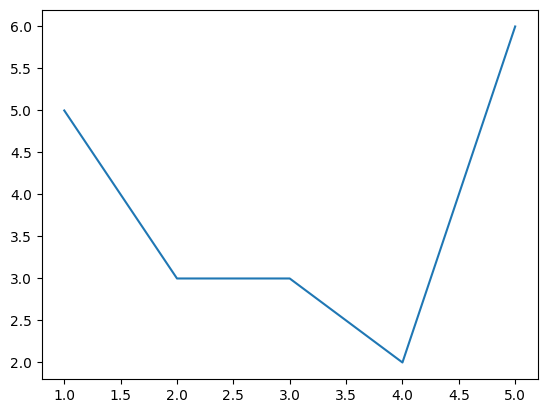

In [1]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [5,3,3,2,6]
plt.plot(x, y)
plt.show()

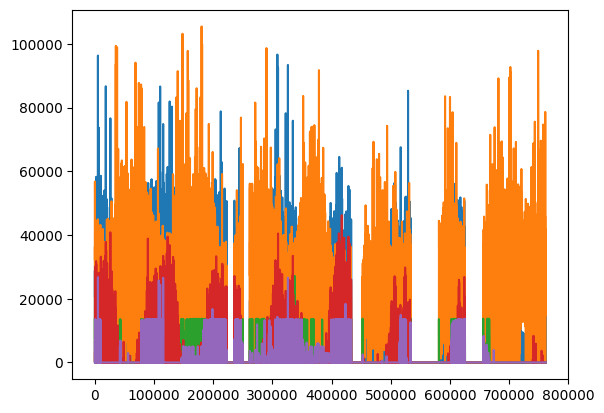

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r'result/general.csv')
 
#for index, row in data.iterrows:
    #plt.plot(index, row['P_pv'])
    #plt.plot(index, row['P_fu'])
    #plt.plot(index, row['P_fs'])
    #plt.plot(index, row['P_tu'])
    #plt.plot(index, row['P_ts'])

plt.plot(data.index, data['P_pv'])
plt.plot(data.index, data['P_fu'])
plt.plot(data.index, data['P_fs'])
plt.plot(data.index, data['P_tu'])
plt.plot(data.index, data['P_ts'])